In [1]:
!pip install opencv-python supervision ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00


Found video file. Processing: Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4
Successfully read the first frame from the video!


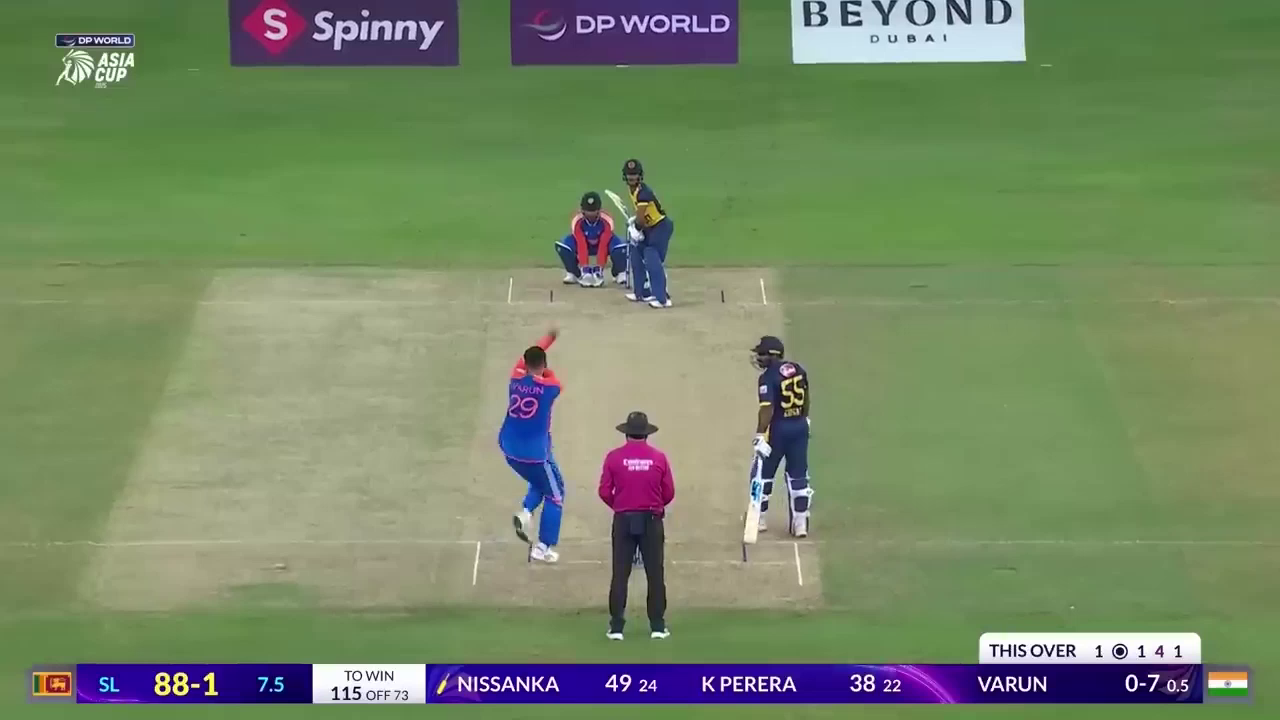

In [7]:
import cv2
import os
from google.colab.patches import cv2_imshow

video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]

if video_files:
    video_path = video_files[0]
    print(f"Found video file. Processing: {video_path}")
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open the video file.")
    else:
        ret, frame = cap.read()
        if ret:
            print("Successfully read the first frame from the video!")
            cv2_imshow(frame)
        else:
            print("Error: Could not read a frame from the video, even though the file opened.")
        cap.release()
else:
    print("No MP4 video files were found in the Colab session storage.")
    print("Please make sure you have uploaded your videos correctly using the file browser on the left.")

Loading YOLOv8 model...
Model loaded successfully.
Processing video: Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4
Detecting players in the frame...

0: 384x640 5 persons, 136.7ms
Speed: 3.8ms preprocess, 136.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Detection complete.
Displaying the frame with detected players.


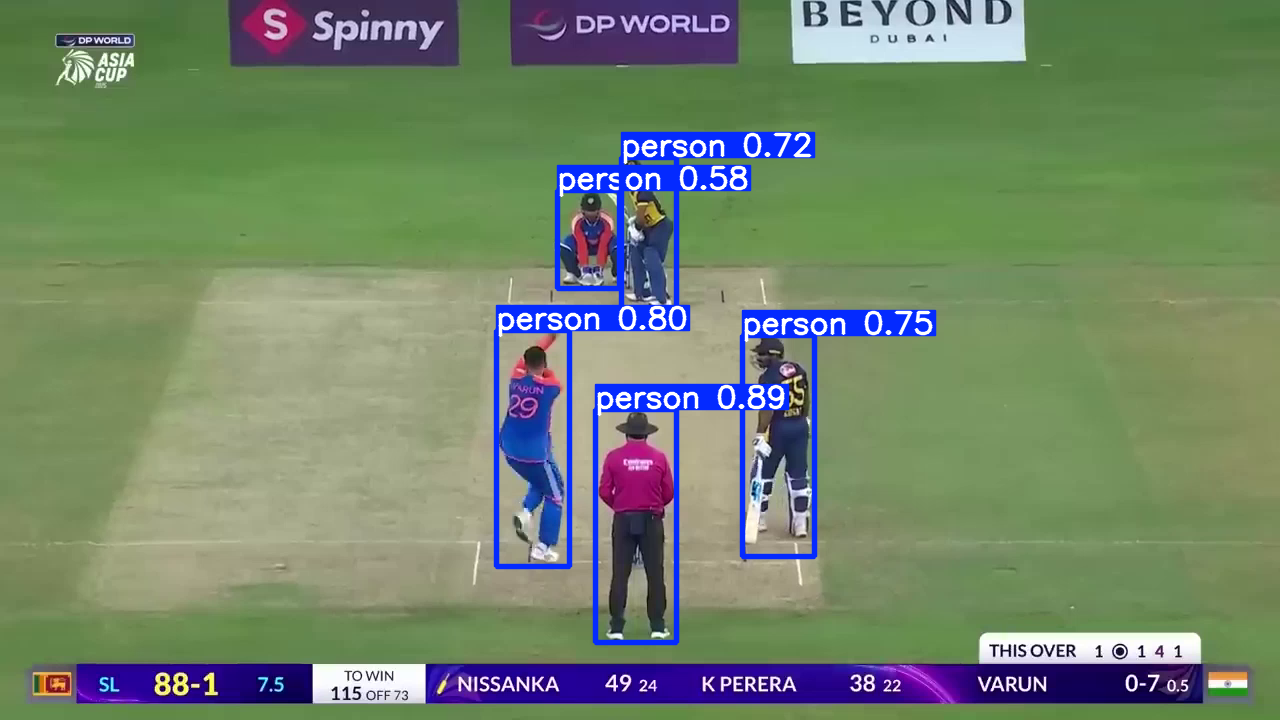

In [8]:
import cv2
import os
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')
print("Model loaded successfully.")

video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]
if video_files:
    video_path = video_files[0]
    print(f"Processing video: {video_path}")

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
    else:
        ret, frame = cap.read()

        if ret:
            print("Detecting players in the frame...")
            results = model.predict(source=frame, conf=0.3, classes=0)
            print("Detection complete.")
            annotated_frame = results[0].plot()

            print("Displaying the frame with detected players.")
            cv2_imshow(annotated_frame)
        else:
            print("Error: Could not read a frame.")
        cap.release()
else:
    print("No MP4 video files found. Please upload your videos.")

In [9]:
import cv2
import os
from ultralytics import YOLO
from google.colab import files

model = YOLO('yolov8n.pt')

video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]
if video_files:
    input_video_path = video_files[0]
    output_video_path = "output_" + os.path.basename(input_video_path)

    print(f"Input video: {input_video_path}")
    print(f"Output video will be saved as: {output_video_path}")

    cap = cv2.VideoCapture(input_video_path)

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    print("\nProcessing video frame by frame...")
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()

        if ret:
            frame_count += 1
            results = model.predict(source=frame, conf=0.3, classes=0, verbose=False)
            annotated_frame = results[0].plot()
            out.write(annotated_frame)
        else:
            break

    print(f"Finished processing {frame_count} frames.")
    cap.release()
    out.release()

    print(f"Output video saved successfully: {output_video_path}")
    print("\nYou can now download the video from the file browser on the left.")

else:
    print("No MP4 video files found. Please upload your videos.")

Input video: Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4
Output video will be saved as: output_Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4

Processing video frame by frame...
Finished processing 378 frames.
Output video saved successfully: output_Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4

You can now download the video from the file browser on the left.


In [10]:
import cv2
import os
from ultralytics import YOLO

print("Loading YOLOv8-Pose model...")
model = YOLO('yolov8n-pose.pt')
print("Model loaded successfully.")

video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]
if video_files:
    input_video_path = video_files[0]
    output_video_path_pose = "output_pose_" + os.path.basename(input_video_path)

    print(f"Input video: {input_video_path}")
    print(f"Output video for pose estimation will be saved as: {output_video_path_pose}")

    cap = cv2.VideoCapture(input_video_path)

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_pose = cv2.VideoWriter(output_video_path_pose, fourcc, fps, (frame_width, frame_height))

    print("\nProcessing video for pose estimation (this might take a while)...")
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        results = model.predict(source=frame, conf=0.3, verbose=False)
        annotated_frame = results[0].plot()
        out_pose.write(annotated_frame)

    print(f"Finished processing {frame_count} frames.")

    cap.release()
    out_pose.release()

    print(f"Pose estimation video saved successfully: {output_video_path_pose}")
    print("You can find the new video in the file browser on the left.")

else:
    print("No MP4 video files found. Please upload your videos.")

Loading YOLOv8-Pose model...
Model loaded successfully.
Input video: Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4
Output video for pose estimation will be saved as: output_pose_Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4

Processing video for pose estimation (this might take a while)...
Finished processing 378 frames.
Pose estimation video saved successfully: output_pose_Pathum Nissanka’s Unstoppable Knock  India vs Sri Lanka  Match 18  DP World Asia Cup 2025.mp4
You can find the new video in the file browser on the left.
